In [23]:
file_path  <- "./datos_verificador_5.csv"
has_header <- TRUE
separator  <- ","

library(lmtest)
library(car)

datos_df <- read.csv(file_path, header = has_header, sep = separator)

cat("C =", colnames(datos_df), "\n")
cat("F =", nrow(datos_df), "\n")
head(datos_df)
summary(datos_df)

C = agua alto masa 
F = 15 


,agua,alto,masa
,<int>,<dbl>,<dbl>
1,110,11.93,76.07
2,110,8.59,72.90
3,102,5.93,68.61
4,114,13.26,73.69
5,112,9.93,73.64
6,106,5.93,71.28


      agua            alto             masa      
 Min.   :102.0   Min.   : 5.260   Min.   :68.13  
 1st Qu.:106.0   1st Qu.: 5.930   1st Qu.:70.57  
 Median :107.0   Median : 7.930   Median :71.80  
 Mean   :107.9   Mean   : 8.372   Mean   :71.82  
 3rd Qu.:110.0   3rd Qu.: 9.930   3rd Qu.:73.62  
 Max.   :114.0   Max.   :13.260   Max.   :76.07  

In [24]:
x_label <- "alto"
y_label <- "agua"
alpha   <- 0.05

n <- nrow(datos_df)
x <- datos_df[[x_label]]
y <- datos_df[[y_label]]

lmodel <- lm(as.formula(paste(y_label, "~", x_label)), data = datos_df)
lmodel


Call:
lm(formula = as.formula(paste(y_label, "~", x_label)), data = datos_df)

Coefficients:
(Intercept)         alto  
     98.813        1.081  


In [25]:
x_mean <- mean(x)
y_mean <- mean(y)
sxx    <- sum((x - x_mean)^2)
syy    <- sum((y - y_mean)^2)
sxy    <- sum((x - x_mean) * (y - y_mean))
b1     <- sxy / sxx
b0     <- y_mean - b1 * x_mean
y_hat  <- b0 + b1 * x
scr    <- sum((y_hat - y_mean)^2)
sce    <- sum((y - y_hat)^2)
sct    <- sum((y - y_mean)^2)
r      <- sxy / sqrt(sxx * syy)
r2     <- scr / sct
f      <- (scr / 1) / (sce / (20 - 2))

cat("b0 =", b0, "\n")
cat("b1 =", b1, "\n")
cat("r  =", r, "\n")
cat("r2 =", r2, "\n")
cat("f  =", f, "\n")

b0 = 98.81288 
b1 = 1.081436 
r  = 0.8652729 
r2 = 0.7486972 
f  = 53.62675 


In [26]:
lmodel_s <- summary(lmodel)
lmodel_r <- lmodel$residuals

b0 <- lmodel$coefficients[[1]]
b1 <- lmodel$coefficients[[2]]
r2 <- lmodel_s$r.squared
r  <- sqrt(r2)
f  <- lmodel_s$fstatistic["value"]

lmodel_s


Call:
lm(formula = as.formula(paste(y_label, "~", x_label)), data = datos_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2258 -0.8521  0.0605  1.0101  2.4988 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  98.8129     1.5290  64.627  < 2e-16 ***
alto          1.0814     0.1738   6.223  3.1e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.822 on 13 degrees of freedom
Multiple R-squared:  0.7487,	Adjusted R-squared:  0.7294 
F-statistic: 38.73 on 1 and 13 DF,  p-value: 3.101e-05


In [27]:
lmodel_av   <- aov(lmodel)
lmodel_av_s <- summary(lmodel_av)

av_s <- lmodel_av_s[[1]][["F value"]][1]
av_p <- lmodel_av_s[[1]][["Pr(>F)"]][1]
av_f <- qf(1 - alpha, 1, n - 2)

lmodel_av_s

            Df Sum Sq Mean Sq F value  Pr(>F)    
alto         1 128.58  128.58   38.73 3.1e-05 ***
Residuals   13  43.16    3.32                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
lmodel_dw <- dwtest(lmodel)

dw_s <- lmodel_dw$statistic
dw_p <- lmodel_dw$p.value
dw_s_m <- sum(diff(lmodel_r)^2) / sum(lmodel_r^2)

lmodel_dw


	Durbin-Watson test

data:  lmodel
DW = 2.8544, p-value = 0.9642
alternative hypothesis: true autocorrelation is greater than 0


In [29]:
lmodel_ks <- ks.test(lmodel_r, "pnorm", mean = mean(lmodel_r), sd = sd(lmodel_r))

dn <- function(n) {
    if (n == 10) {result <- 0.41}
    else if (n == 15) {result <- 0.34}
    else if (n == 20) {result <- 0.29}
    else if (n >= 50) {result <- 1.36 / sqrt(n)}
    return(result)
}

ks_s <- lmodel_ks$statistic
ks_p <- lmodel_ks$p.value
ks_d <- dn(n)

lmodel_ks

Warning message in ks.test.default(lmodel_r, "pnorm", mean = mean(lmodel_r), sd = sd(lmodel_r)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  lmodel_r
D = 0.13704, p-value = 0.9408
alternative hypothesis: two-sided


b0 = 98.81288 
b1 = 1.081436 
r  = 0.8652729 
r2 = 0.7486972 
AV = 38.73043 
 F = 4.667193 
 p = 3.100752e-05 
DW = 2.854402 
 m = 2.854402 
 p = 0.9642052 
KS = 0.1370429 
 D = 0.34 
 p = 0.940806 


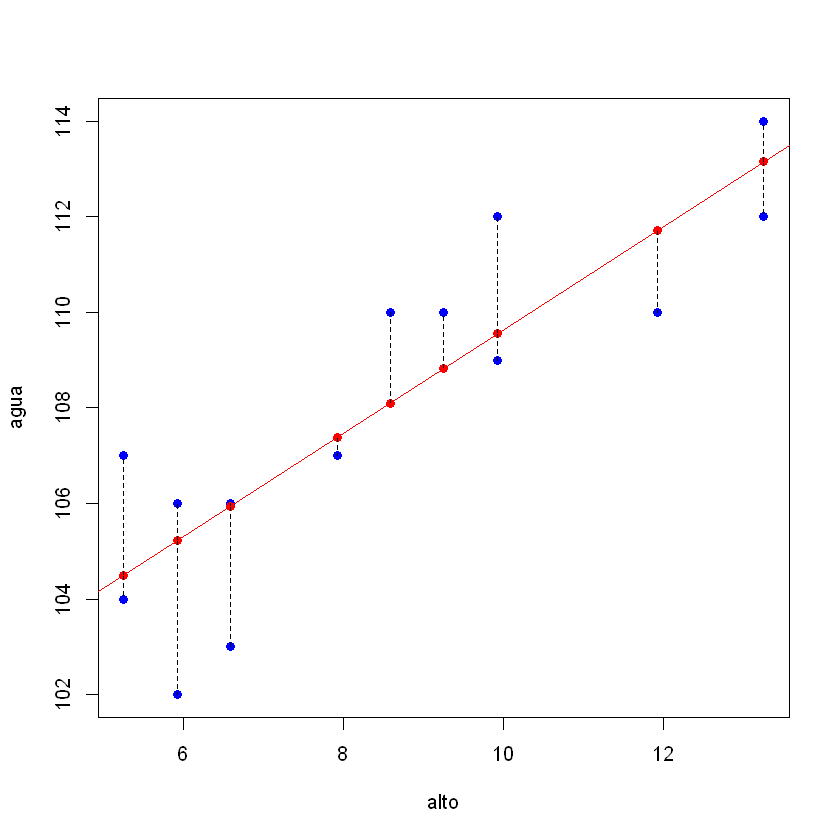

In [30]:
cat("b0 =", b0, "\nb1 =", b1, "\n")
cat("r  =", r, "\nr2 =", r2, "\n")
cat("AV =", av_s, "\n F =", av_f, "\n p =", av_p, "\n")
cat("DW =", dw_s, "\n m =", dw_s_m, "\n p =", dw_p, "\n")
cat("KS =", ks_s, "\n D =", ks_d, "\n p =", ks_p, "\n")

plot(x, y, pch = 16, col = "blue", xlab = x_label, ylab = y_label)
points(x, y_hat, pch = 16, col = "red")
segments(x, y_hat, x, y, col = "black", lty = 2)
abline(lmodel, col = "red")

In [31]:
errs   <- y - y_hat
var    <- sum(errs^2) / (n - 2)
b0_var <- (var * sum(x^2)) / (n * sxx)
b1_var <- var / sxx
b0_inf <- b0 - qt(1 - (alpha / 2), n - 2) * sqrt(b0_var)
b0_sup <- b0 + qt(1 - (alpha / 2), n - 2) * sqrt(b0_var)
b1_inf <- b1 - qt(1 - (alpha / 2), n - 2) * sqrt(b1_var)
b1_sup <- b1 + qt(1 - (alpha / 2), n - 2) * sqrt(b1_var)

cat("b0_c =", b0, "+-", (b0 - b0_inf), "=> [" , b0_inf, ",", b0_sup, "]\n")
cat("b1_c =", b1, "+-", (b1 - b1_inf), "=> [" , b1_inf, ",", b1_sup, "]\n")

b0_c = 98.81288 +- 3.303152 => [ 95.50973 , 102.116 ]
b1_c = 1.081436 +- 0.3754072 => [ 0.706029 , 1.456843 ]


In [32]:
y_p <- predict(lmodel, data.frame(alto = 13.5))

cat("y_p =", y_p, "\n")

y_p = 113.4123 


In [33]:
found <- subset(datos_df, alto == 6)

conf_mode <- if(nrow(found) == 0) "prediction" else "confidence"
conf_interv <- predict(lmodel, data.frame(alto=6), interval = conf_mode, level = 0.90)

y_p   <- conf_interv[1]
y_inf <- conf_interv[2]
y_sup <- conf_interv[3]

found
conf_interv
cat("y_c =", y_p, "+-", (y_p - y_inf), "=> [", y_inf, ",", y_sup, "] (", conf_mode, ")\n")

agua,alto,masa
<int>,<dbl>,<dbl>


,fit,lwr,upr
1,105.3015,101.89,108.713


y_c = 105.3015 +- 3.411512 => [ 101.89 , 108.713 ] ( prediction )
